## Processing : Valid data

In [67]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
### importing the system path
import sys
sys.path.append('../')

In [118]:
### importing the functions from the src files
from src.basic.load_check_data import load_data, get_nan_duplicates_shape, get_info, drop_cols, save_data
from src.feature_engineering.process_categoricals import get_nunique_value_counts, apply_one_hot, apply_label_encode
from src.feature_engineering.handling_nan import get_nan_location, drop_nan_record
from src.feature_engineering.handling_duplicates import get_duplicates, drop_duplicates
from src.feature_engineering.process_numericals import get_format, check_value_counts_numericals, drop_cols_numerical, split_numericals, change_dtype_numericals
from src.feature_engineering.plot_features import plot_graphs, plot_graphs_post_scaling
from src.feature_engineering.scale_transform import scale_valid

In [4]:
### setting up the data path
valid_path = '../data/basic_processed/valid.csv'

In [69]:
### loading the data
valid = load_data(valid_path)
valid.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [70]:
### checking the shape and the nan
get_nan_duplicates_shape(valid)

shape : (2671, 10) 
duplicate values : 26 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [71]:
### checking the info
get_info(valid)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [72]:
### checking the duplicates in the dataset
get_duplicates(valid)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
207,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
230,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,07:00,01:20 02 Apr,18h 20m,2 stops,No info
255,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included
271,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
397,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
444,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
524,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
533,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,In-flight meal not included
768,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included


In [9]:
### the above are not the identical duplicates, so we keep them

In [73]:
### checking the nan location
get_nan_location(valid, 'Route')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [74]:
### dropping the 'Route' column, as we already have the 'Source', 'Destination' and the 'Total_Stops' columns
drop_cols(valid, 'Route')
valid.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


##### =============== Handling the categoricals ===================

In [75]:
### picking up the one hot based cols
one_hot_cols = ['Airline', 'Additional_Info']

In [76]:
### checking their nunique and value counts
get_nunique_value_counts(valid, one_hot_cols)

11 
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64
6 
Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64


In [77]:
### making the 3 categories only for the airlines(keeping top 2)
top_2_airlines = valid['Airline'].value_counts()[:2]
valid['Airline'] = valid['Airline'].apply(lambda x : x if x in top_2_airlines else 'other')

In [78]:
### checking the value counts again for the 'Airline'
get_nunique_value_counts(valid, ['Airline'])

3 
Airline
other          1263
Jet Airways     897
IndiGo          511
Name: count, dtype: int64


In [79]:
### making only 2 categories for the 'Additional_Info' column
valid['Additional_Info'] = valid['Additional_Info'].apply(lambda x : x if x == 'No info' else 'some info')

In [80]:
### checking the value counts again for the 'Additional_Info'
get_nunique_value_counts(valid, ['Additional_Info'])

2 
Additional_Info
No info      2148
some info     523
Name: count, dtype: int64


In [81]:
### applying the one hot encoding on both columns together
valid = apply_one_hot(valid, one_hot_cols)
valid.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,1,0,0
1,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,0,0,0
2,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,1,0,1
3,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,0,1,0
4,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,0,1,0


In [82]:
### label based columns
label_cols = ['Source', 'Destination', 'Total_Stops']

In [83]:
### checking the nunique and value counts in them to decide the labels
get_nunique_value_counts(valid, label_cols)

5 
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64
6 
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64
5 
Total_Stops
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: count, dtype: int64


In [84]:
### for the 'Destination', putting the 'New Delhi' and 'Delhi' as the same
valid['Destination'] = valid['Destination'].apply(lambda x : 'Delhi' if x == 'New Delhi' else x)

In [85]:
### checking the nunique and value_counts for the 'Destination'
get_nunique_value_counts(valid, ['Destination'])

5 
Destination
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: count, dtype: int64


In [86]:
### creating and applying the labels for the 'source'
labels_source = {
'Delhi' : 4,
'Kolkata' : 3,
'Banglore' : 2,
'Mumbai' : 1,
'Chennai' : 0
}
apply_label_encode(valid, 'Source', labels = labels_source)
valid.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,6/06/2019,4,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,1,0,0
1,12/05/2019,3,Banglore,06:20,10:20,4h,1 stop,0,0,0
2,21/05/2019,4,Cochin,19:15,19:00 22 May,23h 45m,1 stop,1,0,1
3,21/05/2019,4,Cochin,08:00,21:00,13h,1 stop,0,1,0
4,24/06/2019,2,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,0,1,0


In [87]:
### creating and applying the labels for the 'destination'
labels_destination = {
'Cochin' : 4,
'Banglore' : 3,
'Delhi' : 2,
'Hyderabad' : 1,
'Kolkata' : 0,
}
apply_label_encode(valid, 'Destination', labels = labels_destination)
valid.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,6/06/2019,4,4,17:30,04:25 07 Jun,10h 55m,1 stop,1,0,0
1,12/05/2019,3,3,06:20,10:20,4h,1 stop,0,0,0
2,21/05/2019,4,4,19:15,19:00 22 May,23h 45m,1 stop,1,0,1
3,21/05/2019,4,4,08:00,21:00,13h,1 stop,0,1,0
4,24/06/2019,2,2,23:55,02:45 25 Jun,2h 50m,non-stop,0,1,0


In [88]:
### creating and applying the labels for the 'Total_Stops'
labels_total_stops = {
'non-stop' : 2,
'1 stop' : 1,
'2 stops' : 0,
'3 stops' : 0,
'4 stops' : 0
}
apply_label_encode(valid, 'Total_Stops', labels = labels_total_stops)
valid.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,6/06/2019,4,4,17:30,04:25 07 Jun,10h 55m,1,1,0,0
1,12/05/2019,3,3,06:20,10:20,4h,1,0,0,0
2,21/05/2019,4,4,19:15,19:00 22 May,23h 45m,1,1,0,1
3,21/05/2019,4,4,08:00,21:00,13h,1,0,1,0
4,24/06/2019,2,2,23:55,02:45 25 Jun,2h 50m,2,0,1,0


In [89]:
### checking the nunique and value counts in the label based column, post label encoding
get_nunique_value_counts(valid, label_cols)

5 
Source
4    1145
3     710
2     555
1     186
0      75
Name: count, dtype: int64
5 
Destination
4    1145
3     710
2     555
1     186
0      75
Name: count, dtype: int64
3 
Total_Stops
1    1431
2     849
0     391
Name: count, dtype: int64


##### =============== Handling the Numericals ===================

In [90]:
### valid.head()
valid.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,6/06/2019,4,4,17:30,04:25 07 Jun,10h 55m,1,1,0,0
1,12/05/2019,3,3,06:20,10:20,4h,1,0,0,0
2,21/05/2019,4,4,19:15,19:00 22 May,23h 45m,1,1,0,1
3,21/05/2019,4,4,08:00,21:00,13h,1,0,1,0
4,24/06/2019,2,2,23:55,02:45 25 Jun,2h 50m,2,0,1,0


In [91]:
### for the numerical columns, we will be splitting them, but before that
### we will be looking for any anomaly by just checking the different formats available in the columns

In [92]:
### Date of Jounrey
### defining the patterns for the entries/records in the column
patterns_date_of_journey = {
    "DD-MM-YYYY":          r"^\d{2}-\d{2}-\d{4}$",
    "DD/MM/YYYY":          r"^\d{2}/\d{2}/\d{4}",
    "D/MM/YYYY":          r"^\d{1}/\d{2}/\d{4}"
}

In [93]:
### checking the different format options
get_format(valid, 'Date_of_Journey', patterns = patterns_date_of_journey)

Date_of_Journey
10    1569
9     1102
Name: count, dtype: int64
total records : 2671
DD-MM-YYYY : 0
DD/MM/YYYY : 1569
D/MM/YYYY : 1102


In [94]:
### splitting the column
split_numericals(valid, 'Date_of_Journey', sep = '/', new_cols = ['day', 'month', 'year'])
valid.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year
0,4,4,17:30,04:25 07 Jun,10h 55m,1,1,0,0,6,06,2019
1,3,3,06:20,10:20,4h,1,0,0,0,12,05,2019
2,4,4,19:15,19:00 22 May,23h 45m,1,1,0,1,21,05,2019
3,4,4,08:00,21:00,13h,1,0,1,0,21,05,2019
4,2,2,23:55,02:45 25 Jun,2h 50m,2,0,1,0,24,06,2019


In [95]:
### checking the value counts in the new one, only 'nunique'
check_value_counts_numericals(valid, cols = ['Date_of_Journey_day', 'Date_of_Journey_month', 'Date_of_Journey_year'])

14 
Date_of_Journey_day
9     342
6     311
15    267
12    257
21    257
24    255
1     240
27    220
3     209
18    204
01     34
06     28
03     26
09     21
Name: count, dtype: int64
4 
Date_of_Journey_month
06    872
05    863
03    688
04    248
Name: count, dtype: int64
1 
Date_of_Journey_year
2019    2671
Name: count, dtype: int64


In [96]:
### dropping off the year column and old 'Date_of_Jounrey' column
drop_cols_numerical(valid, ['Date_of_Journey_year'])
valid.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month
0,4,4,17:30,04:25 07 Jun,10h 55m,1,1,0,0,6,06
1,3,3,06:20,10:20,4h,1,0,0,0,12,05
2,4,4,19:15,19:00 22 May,23h 45m,1,1,0,1,21,05
3,4,4,08:00,21:00,13h,1,0,1,0,21,05
4,2,2,23:55,02:45 25 Jun,2h 50m,2,0,1,0,24,06


In [97]:
### 'Dep_Time' column
### defining the patterns for the column
patterns_arrival_dep_time = {
    "HH:MM" : r"^\d{2}:\d{2}$",
    "HH:MM DD MON" : r"^\d{2}:\d{2}\s\d{1,2}\s[A-Za-z]{3}$"
}

In [98]:
### finding the different patterns
get_format(valid, 'Dep_Time', patterns = patterns_arrival_dep_time)

Dep_Time
5    2671
Name: count, dtype: int64
total records : 2671
HH:MM : 2671
HH:MM DD MON : 0


In [99]:
### we can begin the split, as it has no different pattern
split_numericals(valid, 'Dep_Time', sep = ':', new_cols = ['hour', 'minute'])
valid.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute
0,4,4,04:25 07 Jun,10h 55m,1,1,0,0,6,06,17,30
1,3,3,10:20,4h,1,0,0,0,12,05,06,20
2,4,4,19:00 22 May,23h 45m,1,1,0,1,21,05,19,15
3,4,4,21:00,13h,1,0,1,0,21,05,08,00
4,2,2,02:45 25 Jun,2h 50m,2,0,1,0,24,06,23,55


In [100]:
### using the same patterns to find odd patterns on the 'Arrival_Time'
get_format(valid, 'Arrival_Time', patterns = patterns_arrival_dep_time)

Arrival_Time
5     1605
12    1066
Name: count, dtype: int64
total records : 2671
HH:MM : 1605
HH:MM DD MON : 1066


In [101]:
### making the first split to keep the only necessary part for the 'Arrival_Time' column and
### then we will make the split
valid['Arrival_Time'] = valid['Arrival_Time'].str.split(' ').str[0]
valid.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute
0,4,4,04:25,10h 55m,1,1,0,0,6,06,17,30
1,3,3,10:20,4h,1,0,0,0,12,05,06,20
2,4,4,19:00,23h 45m,1,1,0,1,21,05,19,15
3,4,4,21:00,13h,1,0,1,0,21,05,08,00
4,2,2,02:45,2h 50m,2,0,1,0,24,06,23,55


In [102]:
### checking the patterns again
get_format(valid, 'Arrival_Time', patterns = patterns_arrival_dep_time)

Arrival_Time
5    2671
Name: count, dtype: int64
total records : 2671
HH:MM : 2671
HH:MM DD MON : 0


In [103]:
### making the split for the ':' column
split_numericals(valid, col = 'Arrival_Time', sep = ':', new_cols = ['hour', 'minute'])
valid.head()

,Source,Destination,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,4,4,10h 55m,1,1,0,0,6,06,17,30,04,25
1,3,3,4h,1,0,0,0,12,05,06,20,10,20
2,4,4,23h 45m,1,1,0,1,21,05,19,15,19,00
3,4,4,13h,1,0,1,0,21,05,08,00,21,00
4,2,2,2h 50m,2,0,1,0,24,06,23,55,02,45


In [104]:
### defining the patterns for the 'Duration' column
patterns_duration = {
    "DURATION_H_M": r"^\d+h \d+m$",
    "DURATION_H": r"^\d+h$",
    "DURATION_M": r"^\d+m$"
}

In [105]:
### finding the patterns
get_format(valid, 'Duration', patterns = patterns_duration)

Duration
6    1367
7     992
2     128
3     126
5      58
Name: count, dtype: int64
total records : 2671
DURATION_H_M : 2417
DURATION_H : 253
DURATION_M : 1


In [106]:
### finding out the location for that record where pattern is like 'Duration_M'
valid[valid['Duration'].str.match(r'^\d+m$')]

,Source,Destination,Duration,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
2660,1,1,5m,0,0,1,0,12,03,16,50,16,55


In [107]:
### dropping off the record 2660
valid.drop(2660, axis = 0, inplace = True)

In [108]:
### checking off the pattern again
get_format(valid, 'Duration', patterns = patterns_duration)

Duration
6    1367
7     992
2     127
3     126
5      58
Name: count, dtype: int64
total records : 2670
DURATION_H_M : 2417
DURATION_H : 253
DURATION_M : 0


In [109]:
### spliting and only taking the 'hours' part
split_numericals(valid, 'Duration', sep = 'h', new_cols = ['hour'])
valid.head()

,Source,Destination,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,4,4,1,1,0,0,6,06,17,30,04,25,10
1,3,3,1,0,0,0,12,05,06,20,10,20,4
2,4,4,1,1,0,1,21,05,19,15,19,00,23
3,4,4,1,0,1,0,21,05,08,00,21,00,13
4,2,2,2,0,1,0,24,06,23,55,02,45,2


In [110]:
### checking the dtype of the columns 
get_info(valid)

<class 'pandas.core.frame.DataFrame'>
Index: 2670 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Source                     2670 non-null   int64 
 1   Destination                2670 non-null   int64 
 2   Total_Stops                2670 non-null   int64 
 3   Airline_Jet Airways        2670 non-null   int32 
 4   Airline_other              2670 non-null   int32 
 5   Additional_Info_some info  2670 non-null   int32 
 6   Date_of_Journey_day        2670 non-null   object
 7   Date_of_Journey_month      2670 non-null   object
 8   Dep_Time_hour              2670 non-null   object
 9   Dep_Time_minute            2670 non-null   object
 10  Arrival_Time_hour          2670 non-null   object
 11  Arrival_Time_minute        2670 non-null   object
 12  Duration_hour              2670 non-null   object
dtypes: int32(3), int64(3), object(7)
memory usage: 260.7+ KB


In [111]:
### changing the dtype of the columns 'object' to 'int64'
cols_for_change_dtype = valid.select_dtypes(include = 'object').columns
cols_for_change_dtype

Index(['Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hour'],
      dtype='object')

In [112]:
### changing the dtype now
change_dtype_numericals(valid, cols_for_change_dtype, target_type = 'int64')

In [113]:
### checking agin the info
get_info(valid)

<class 'pandas.core.frame.DataFrame'>
Index: 2670 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Source                     2670 non-null   int64
 1   Destination                2670 non-null   int64
 2   Total_Stops                2670 non-null   int64
 3   Airline_Jet Airways        2670 non-null   int32
 4   Airline_other              2670 non-null   int32
 5   Additional_Info_some info  2670 non-null   int32
 6   Date_of_Journey_day        2670 non-null   int64
 7   Date_of_Journey_month      2670 non-null   int64
 8   Dep_Time_hour              2670 non-null   int64
 9   Dep_Time_minute            2670 non-null   int64
 10  Arrival_Time_hour          2670 non-null   int64
 11  Arrival_Time_minute        2670 non-null   int64
 12  Duration_hour              2670 non-null   int64
dtypes: int32(3), int64(10)
memory usage: 260.7 KB


##### =============== plotting, scaling and transformation part ================

In [114]:
### plotting the graphs for the features
features_to_plot = valid.select_dtypes(include = 'int64').columns
features_to_plot

Index(['Source', 'Destination', 'Total_Stops', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour'],
      dtype='object')

feature : Source


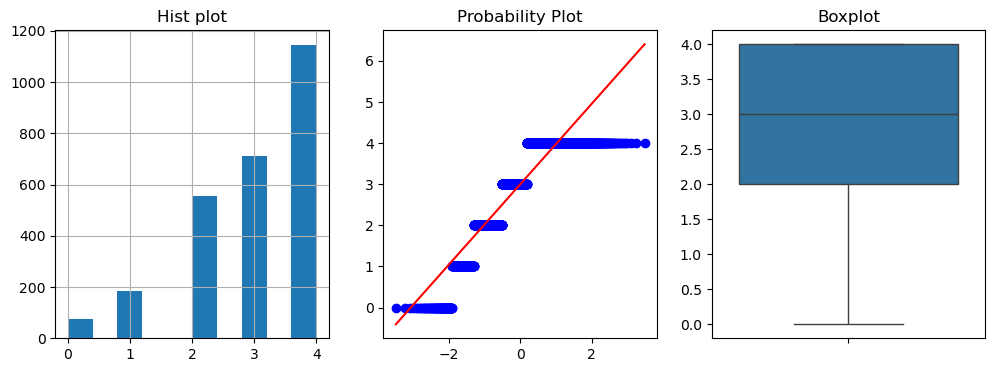

feature : Destination


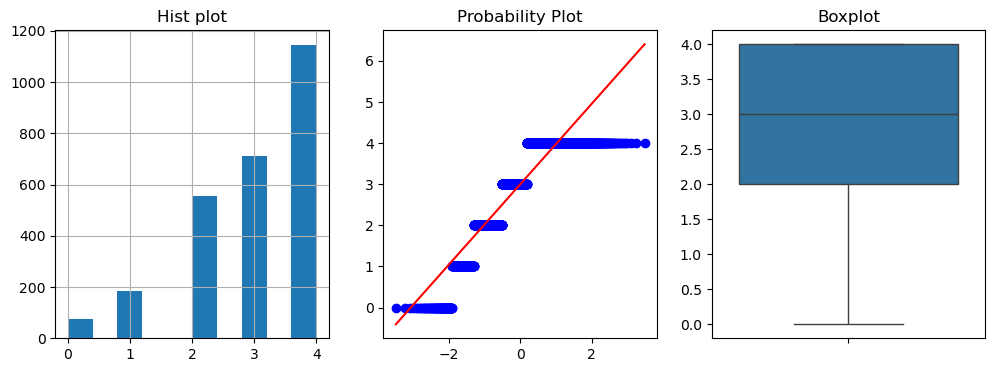

feature : Total_Stops


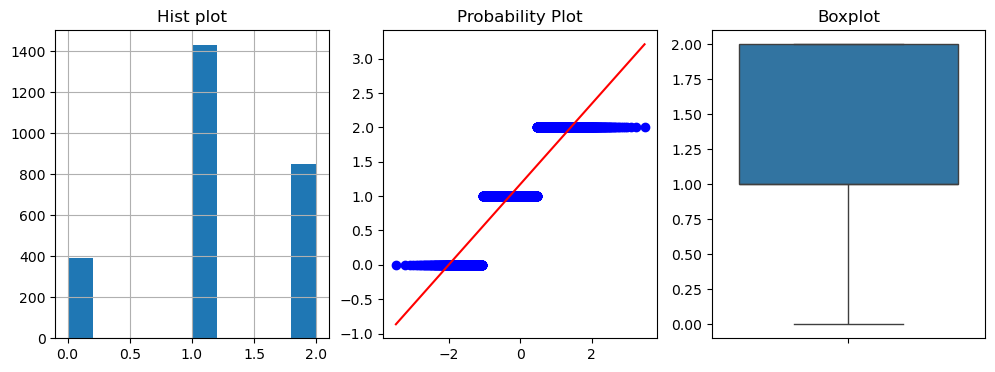

feature : Date_of_Journey_day


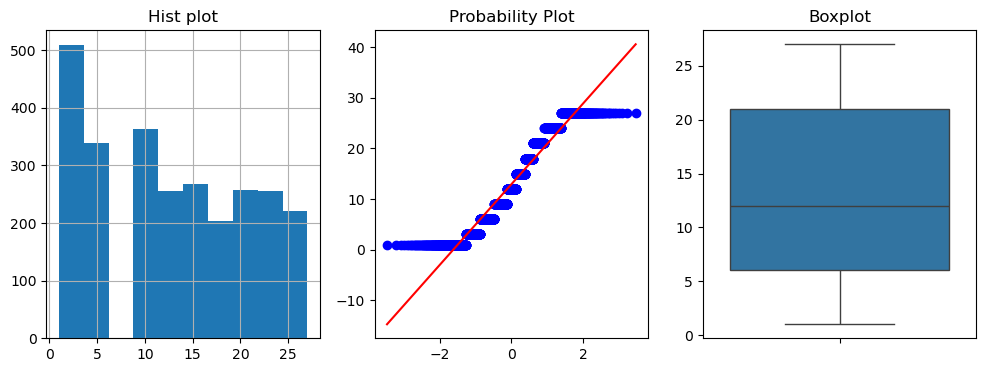

feature : Date_of_Journey_month


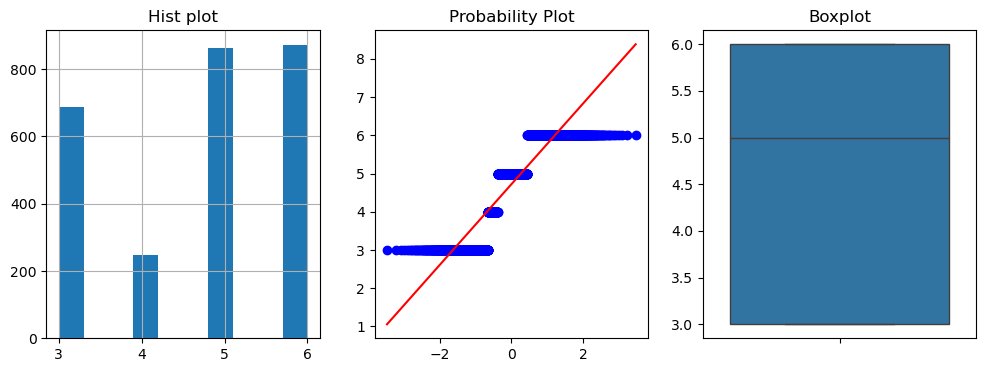

feature : Dep_Time_hour


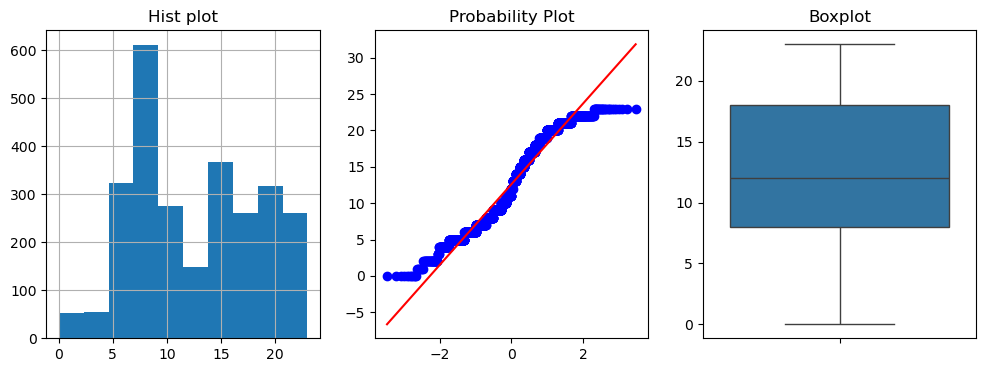

feature : Dep_Time_minute


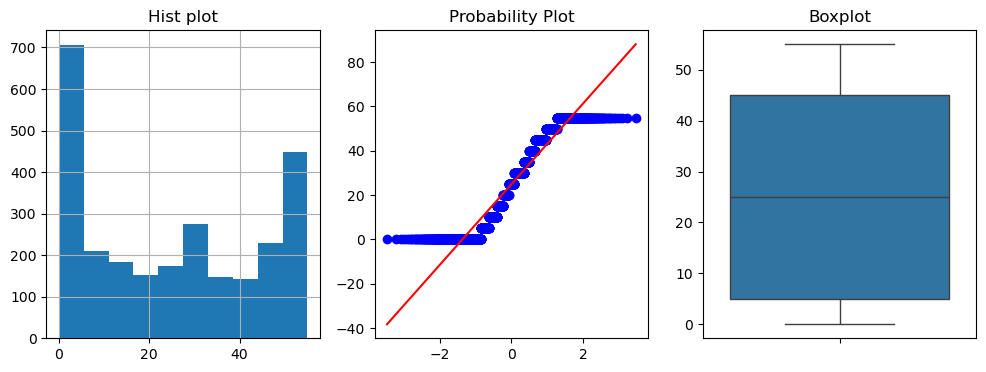

feature : Arrival_Time_hour


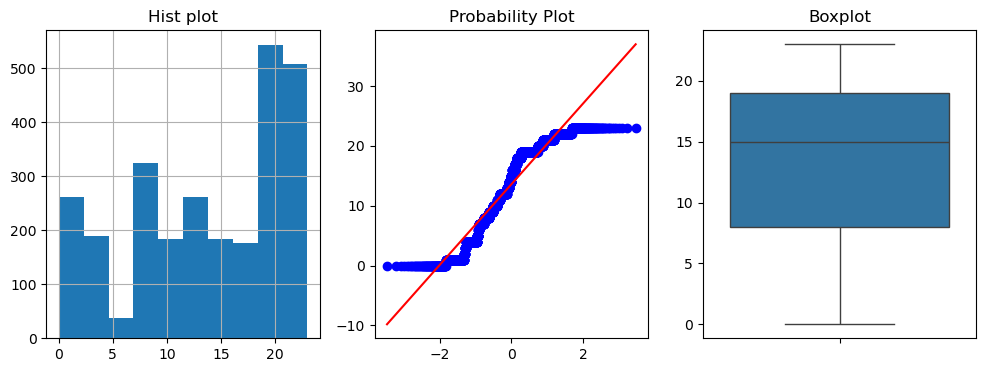

feature : Arrival_Time_minute


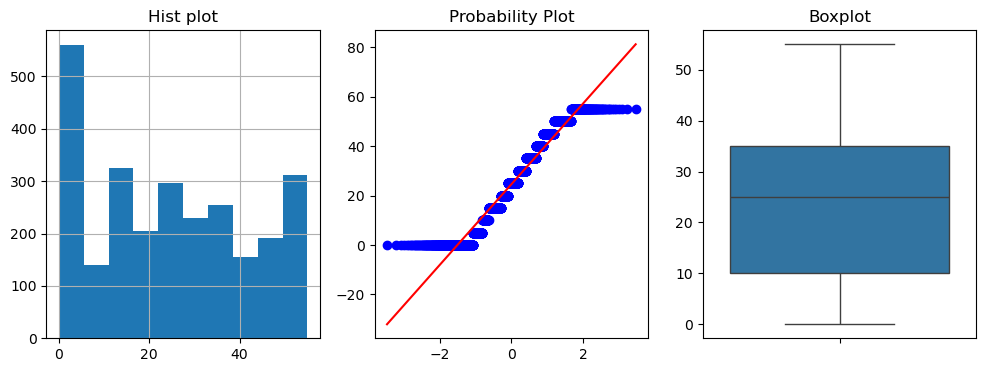

feature : Duration_hour


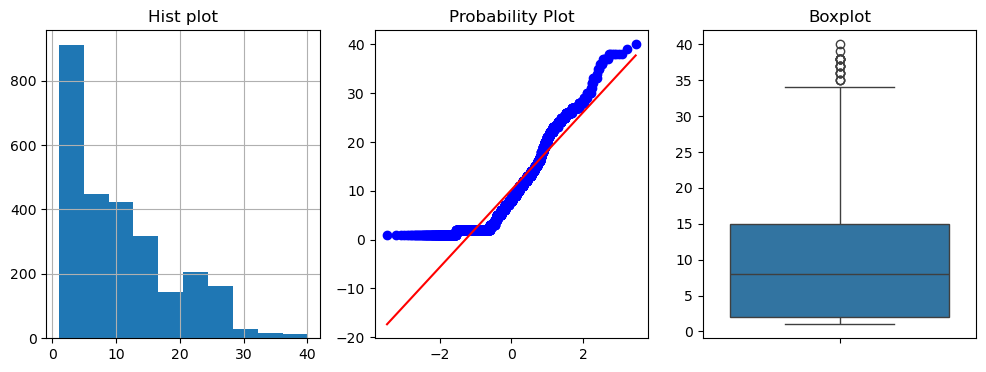

In [115]:
### plotting the features
plot_graphs(valid, cols = features_to_plot)

In [116]:
### so, the above data is our 'valid_tree' data
### setting up the path and saving the data
valid_tree = valid.copy()
valid_tree_path = '../data/model_ready/valid_tree.csv'
save_data(valid_tree, valid_tree_path)

In [117]:
### loading the data and checking it everything went good
valid_tree = load_data(valid_tree_path)
valid_tree.head()

,Source,Destination,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,4,4,1,1,0,0,6,6,17,30,4,25,10
1,3,3,1,0,0,0,12,5,6,20,10,20,4
2,4,4,1,1,0,1,21,5,19,15,19,0,23
3,4,4,1,0,1,0,21,5,8,0,21,0,13
4,2,2,2,0,1,0,24,6,23,55,2,45,2


##### =================== working for the distance based models ======================

In [63]:
### now the data is in good shape and follows the bell curve
### next we are gonna prepare for the scaling the data, maing it ready for the distance based models

In [119]:
### sacling the rest of the columns
cols_to_scale_rest = valid.columns.drop([
    'Source', 'Destination', 'Total_Stops', 'Airline_Jet Airways','Airline_other', 'Additional_Info_some info'
    ])
cols_to_scale_rest

Index(['Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hour'],
      dtype='object')

In [120]:
### setting up the scaler path and scaling the data
scaler_for_rest_path = '../scalers/scaler_for_rest.pkl'
scale_valid(valid, cols_to_scale_rest, scaler_path = scaler_for_rest_path)
valid.head()

,Source,Destination,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,4,4,1,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,3,3,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,4,4,1,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,4,4,1,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,2,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


feature : Source


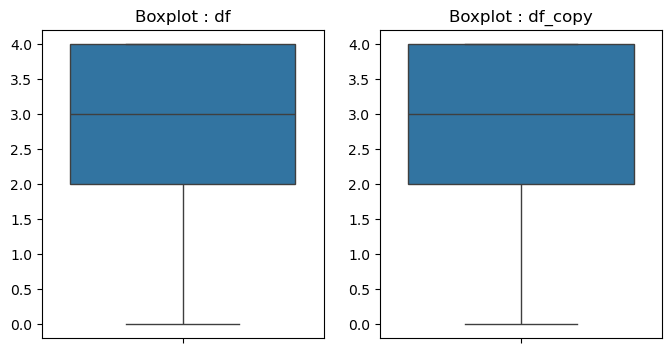

feature : Destination


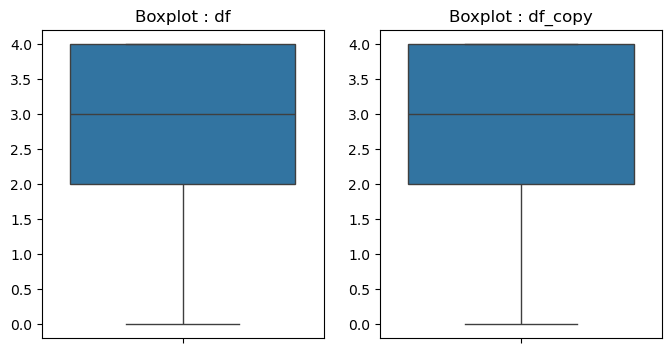

feature : Total_Stops


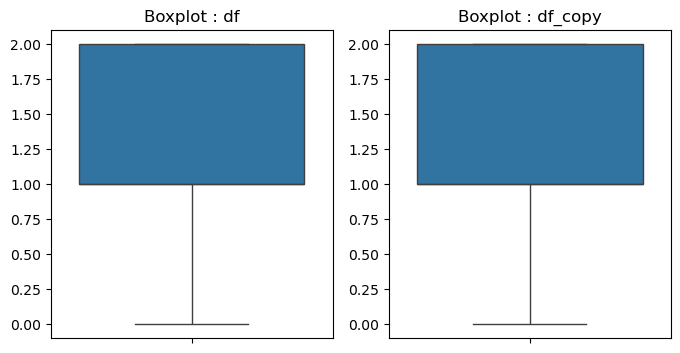

feature : Airline_Jet Airways


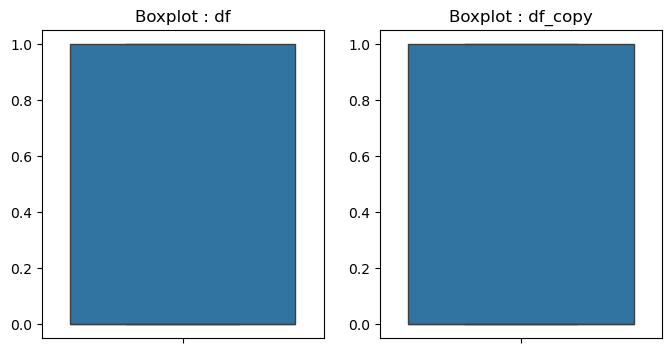

feature : Airline_other


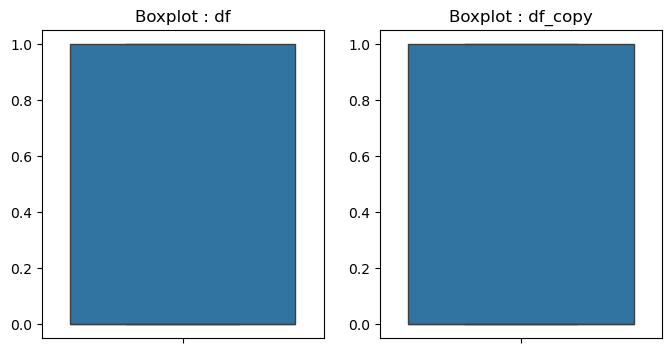

feature : Additional_Info_some info


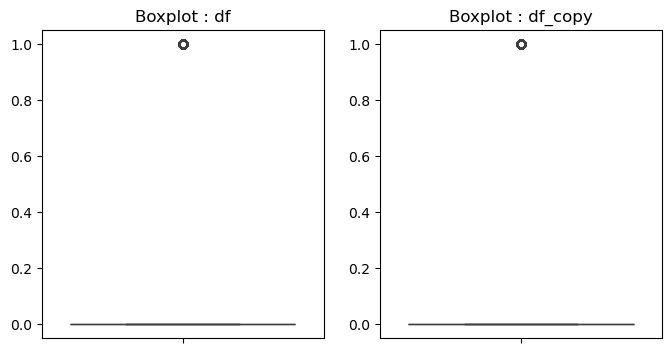

feature : Date_of_Journey_day


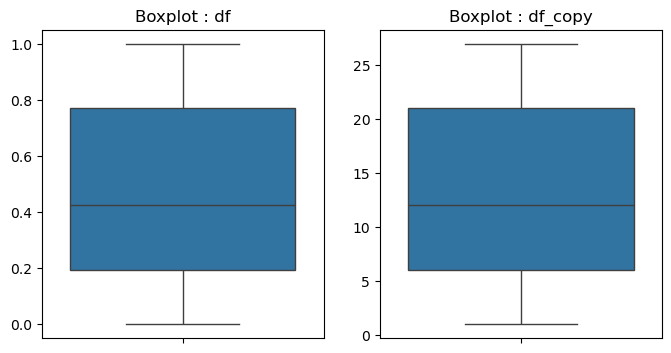

feature : Date_of_Journey_month


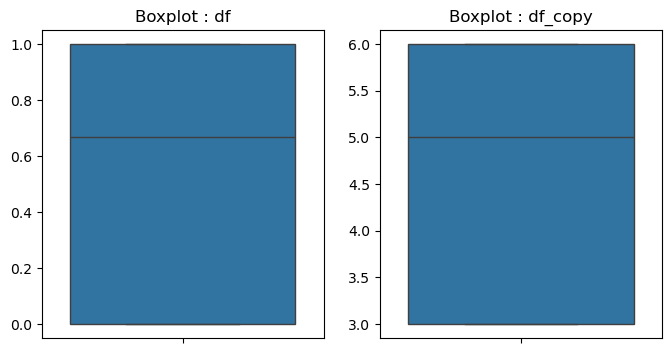

feature : Dep_Time_hour


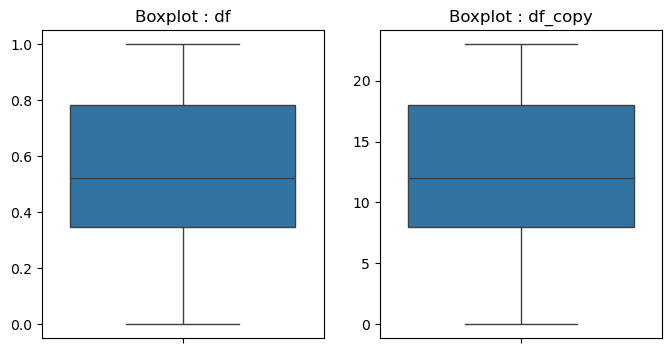

feature : Dep_Time_minute


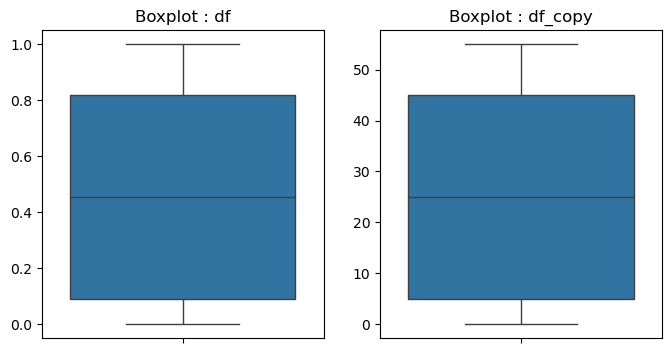

feature : Arrival_Time_hour


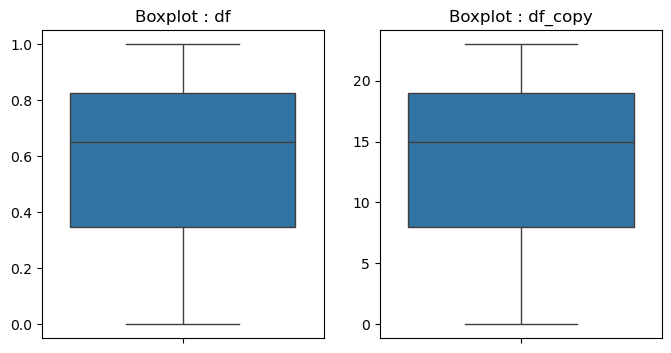

feature : Arrival_Time_minute


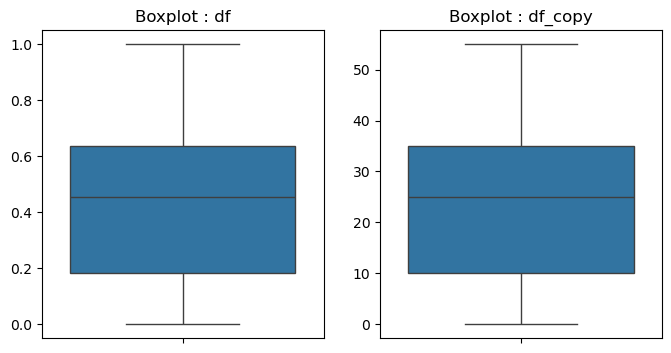

feature : Duration_hour


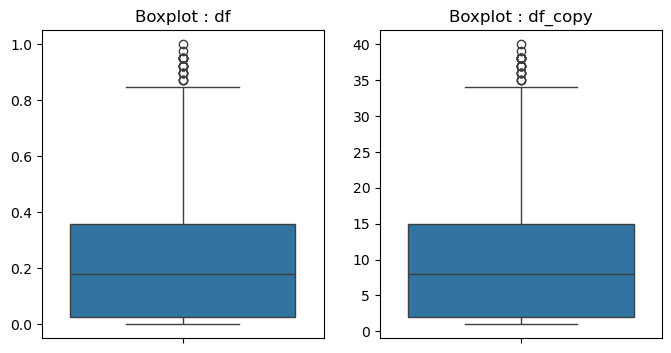

In [121]:
### comparing the data pre, post scaling with respect to the tree data
plot_graphs_post_scaling(valid, valid_tree, cols = valid.columns)

In [122]:
### making the copy and saving the data for the distance based models
valid_distance = valid.copy()
valid_distance_path = '../data/model_ready/valid_distance.csv'
save_data(valid_distance, valid_distance_path)

In [123]:
### loading the data to check if everything went well
valid_distance = load_data(valid_distance_path)
valid_distance.head()

,Source,Destination,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,4,4,1,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,3,3,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,4,4,1,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,4,4,1,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,2,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641
